In [ ]:
# Initial imports and installs
!pip install dmba
import os
import math
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 76.7 MB/s eta 0:00:00
Colab environment detected.


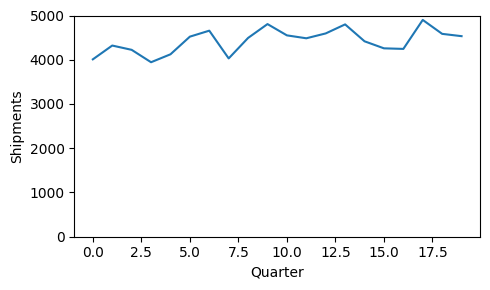

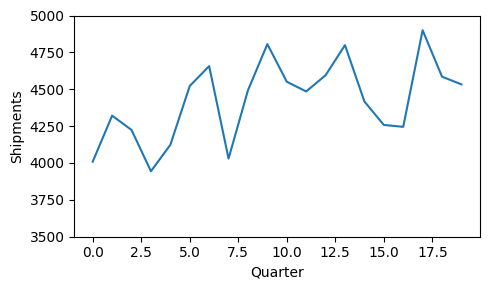

In [ ]:
# Q1) Shipments of Household Appliances: Line Graphs
# The file ApplianceShipments.csv contains the series of quarterly shipments
# (in millions of dollars) of US household appliances between 1985 and 1989.

appliance_shipments = dmba.load_data('ApplianceShipments.csv')
appliance_shipments.head(10)
#appliance_shipments

# Time Plot: Create a well-formatted time plot of the data using Python.
appliance_shipments.plot(ylim=[0,5000], legend=False, figsize=[5,3])
plt.xlabel('Quarter')
plt.ylabel('Shipments')
plt.tight_layout()
plt.show()

# Quarterly Pattern: Does there appear to be a quarterly pattern? For
# a closer view of the patterns, zoom in to the range of 3500–5000 on
# the y-axis
appliance_shipments.plot(ylim=[3500,5000], legend=False, figsize=[5,3])
plt.xlabel('Quarter')
plt.ylabel('Shipments')
plt.tight_layout()
plt.show()
# The quarterly pattern seems to depict an up-and-down movement of shipments.

# Line Graph for Each Quarter: Using Python, create one chart with
# four separate lines, one line for each of Q1, Q2, Q3, and Q4. In Python,
# this can be achieved by add column for quarter and year. Then group
# the data frame by quarter and then plot shipment versus year for each
# quarter as a separate series on a line graph. Zoom in to the range of
# 3500–5000 on the y-axis. Does there appear to be a difference
# between quarters?


#appliance_shipments['Quarter'] = appliance_shipments['Quarter'].dt.quarter
#appliance_shipments['Year'] = appliance_shipments['Quarter'].dt.year


# Yearly Aggregated Line Graph: Using Python, create a line graph of
# the series at a yearly aggregated level (i.e., the total shipments in
# each year).


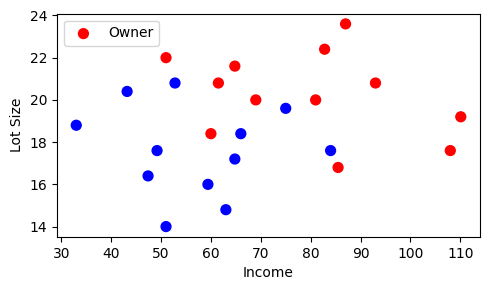

In [ ]:
# Q2) Sales of Riding Mowers: Scatter Plots
# A company that manufactures riding mowers wants to identify the best sales
# prospects for an intensive sales campaign. In particular, the manufacturer is
# interested in classifying households as prospective owners or nonowners on
# the basis of Income (in $1000s) and Lot Size (in 1000 ft2). The marketing
# expert looked at a random sample of 24 households, given in the file
# RidingMowers.csv.
riding_mowers = dmba.load_data('RidingMowers.csv')

# Scatter Plot: Using Python, create a scatter plot of Lot Size vs.
# Income, color-coded by the outcome variable owner/nonowner. Make
# sure to obtain a well-formatted plot (create legible labels and a legend,
# etc.).
fig, ax = plt.subplots()
fig.set_size_inches(5,3)

def get_colors(col):
  cols=[]
  for c in col:
    if c == 'Owner':
      cols.append('red')
    else:
      cols.append('blue')
  return cols

cols=get_colors(riding_mowers.Ownership)

ax.scatter(
    riding_mowers.Income,
    riding_mowers.Lot_Size,
    s=50,
    c=cols
)

plt.xlabel('Income')
plt.ylabel('Lot Size')
plt.legend(['Owner'], loc='upper left')
plt.tight_layout()
plt.show()

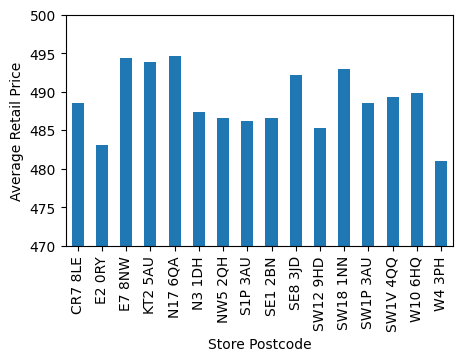

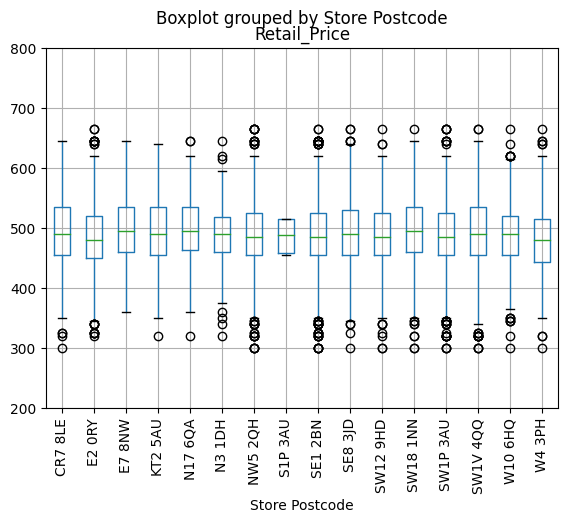

In [ ]:
# Q3) Laptop Sales at a London Computer Chain: Bar Charts and Boxplots
# The file LaptopSalesJanuary2008.csv contains data for all sales of laptops at
# a computer chain in London in January 2008. This is a subset of the full
# dataset that includes data for the entire year.
laptop_sales = dmba.load_data('LaptopSalesJanuary2008.csv')

# Bar Chart: Create a bar chart, showing the average retail price by
# store. Which store has the highest average? Which has the lowest?
laptop_sales = laptop_sales.rename(columns={'Retail Price': 'Retail_Price'})
laptop_sales.head(10)

ax = laptop_sales.groupby('Store Postcode').mean(numeric_only=True).Retail_Price.plot(
    kind='bar',
    figsize=[5,3]
)
ax.set_ylabel('Average Retail Price')
plt.ylim([470,500])
plt.show()
# The stores with the highest average are postal codes E7 8NW and N17 6QA.
# The store with the lowest average is postal code W4 3PH.

# Boxplots: To better compare retail prices across stores, create side-
# by-side boxplots of retail price by store. Now compare the prices in the
# two stores from (a). Does there seem to be a difference between their
# price distributions?
laptop_sales.boxplot(column='Retail_Price',by='Store Postcode')
plt.ylim([200,800])
plt.xticks(rotation=90)
plt.show()
# The stores mentioned in the above analysis definitely experience a difference
# in regard to their price distributions, as seen by the box plot.

Mean:
calories    106.883117
protein       2.545455
fat           1.012987
sodium      159.675325
carbo        14.802632
sugars        7.026316
potass       98.666667
vitamins     28.246753
weight        1.029610
cups          0.821039
dtype: float64

Median:
calories    110.00
protein       3.00
fat           1.00
sodium      180.00
carbo        14.50
sugars        7.00
potass       90.00
vitamins     25.00
weight        1.00
cups          0.75
dtype: float64

Min:
calories    50.00
protein      1.00
fat          0.00
sodium       0.00
carbo        5.00
sugars       0.00
potass      15.00
vitamins     0.00
weight       0.50
cups         0.25
dtype: float64

Max:
calories    160.0
protein       6.0
fat           5.0
sodium      320.0
carbo        23.0
sugars       15.0
potass      330.0
vitamins    100.0
weight        1.5
cups          1.5
dtype: float64

Standard deviation:
calories    19.484119
protein      1.094790
fat          1.006473
sodium      83.832295
carbo        3.907326
su

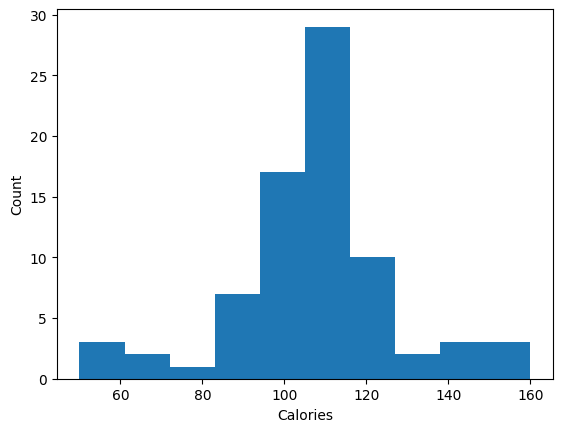

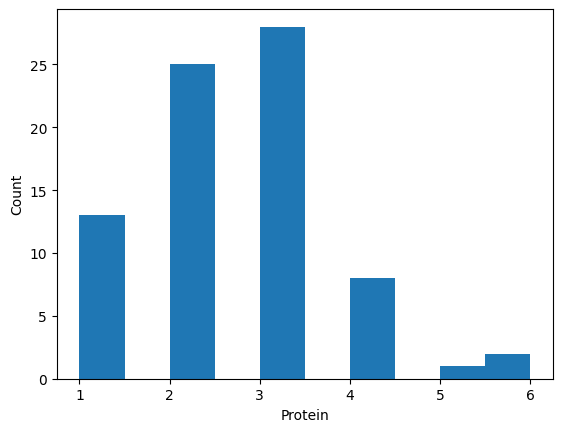

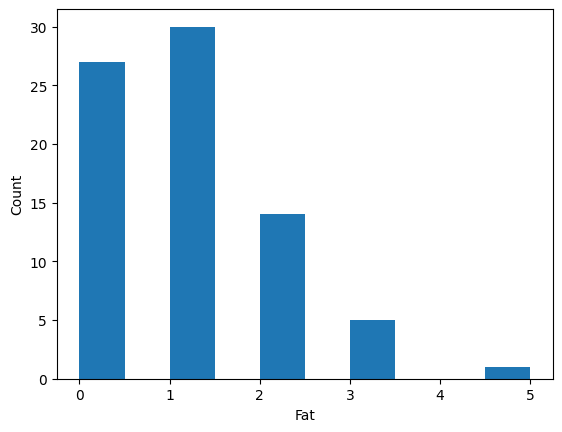

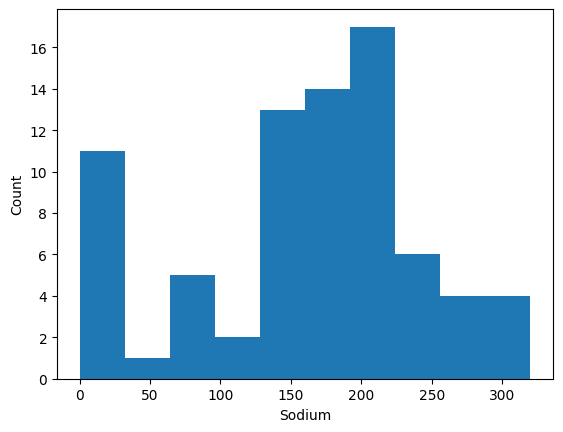

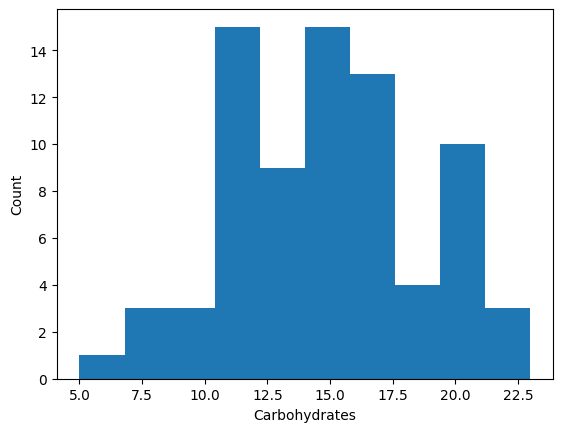

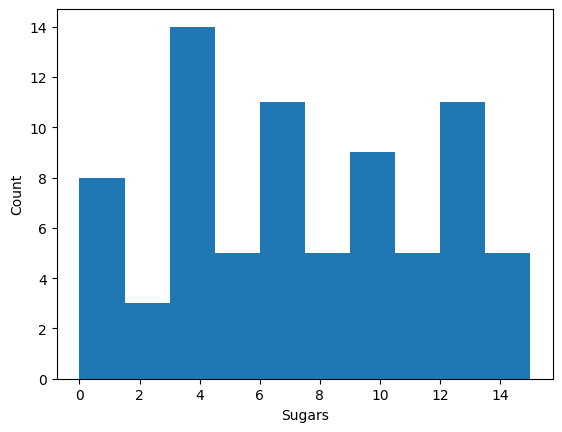

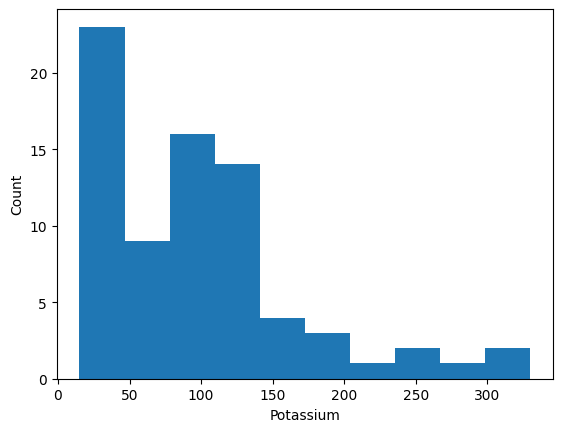

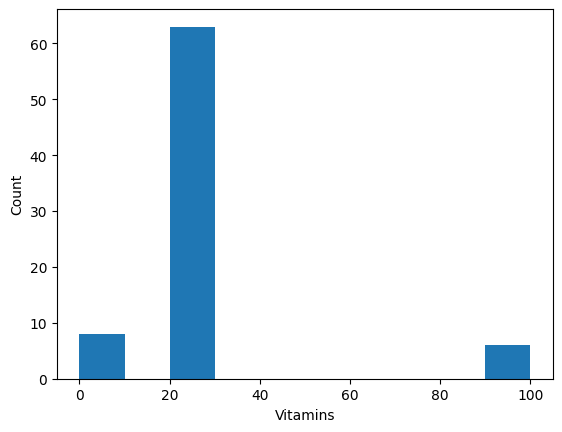

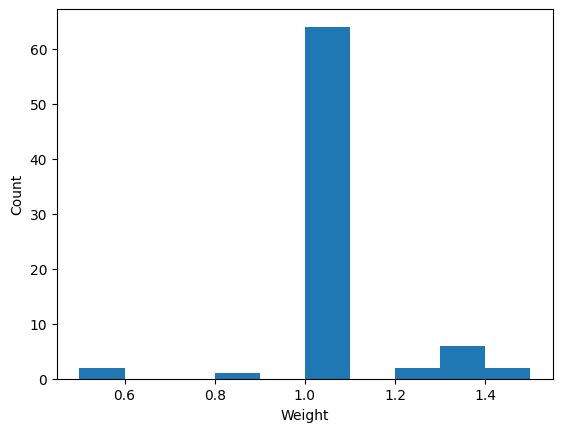

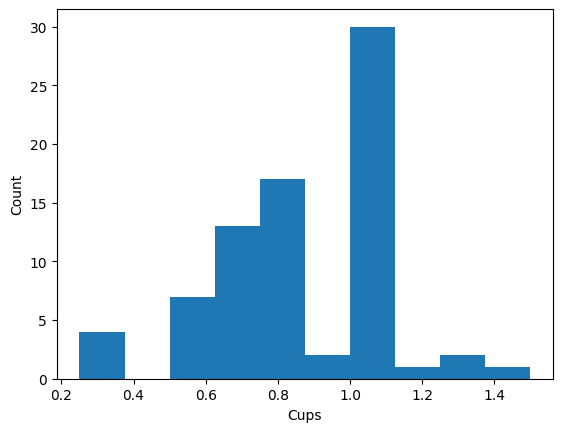

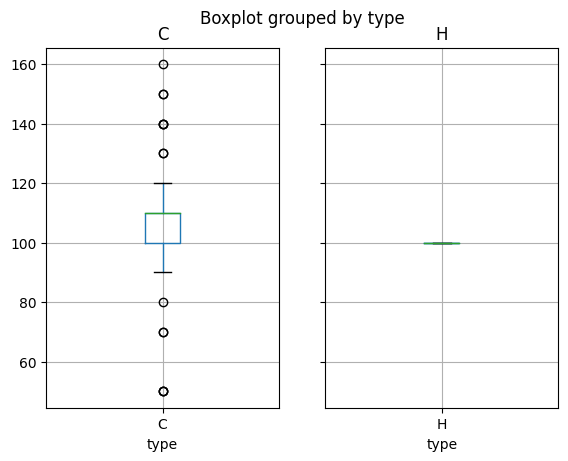

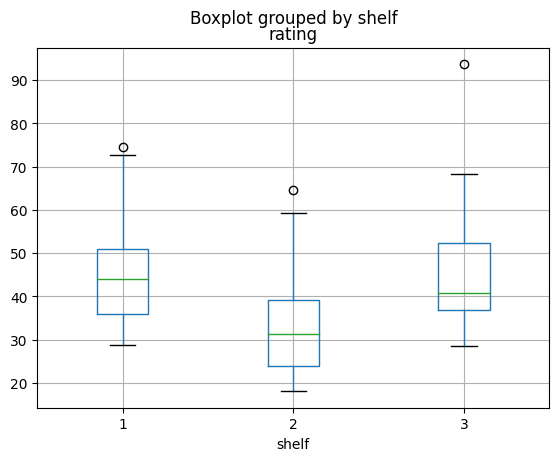

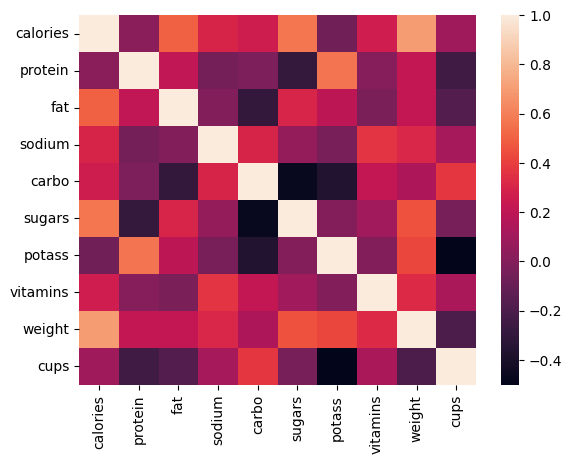

In [ ]:
# Q4) Breakfast Cereals
# Use the data from Cereals.csv to explore and summarize the data.
df = dmba.load_data('Cereals.csv')

# Variable Types: Which variables are quantitative/numerical? Which
# are ordinal? Which are nominal?
# The variables of the cereal csv may be sorted into the following:
# Quantitative: calories, protein, fat, sodium, carbo, sugars, potass,
# vitamins, weight, cups
# Ordinal: rating
# Nominal: name, mfr, type, shelf

# Summary Statistics: the mean, median, min, max, and standard
# deviation for each quantitative variable using pandas.
quantitative = df[['calories','protein','fat','sodium','carbo','sugars','potass','vitamins','weight','cups']]
print("Mean:")
print(quantitative.mean())
print("\nMedian:")
print(quantitative.median())
print("\nMin:")
print(quantitative.min())
print("\nMax:")
print(quantitative.max())
print("\nStandard deviation:")
print(quantitative.std())

# Histograms: Plot a histogram for each of the quantitative variables.
# Based on the histograms and summary statistics, answer the following
# questions:
# I. Which variables have the largest variability?
# II. Which variables seem skewed?
# III. Are there any values that seem extreme?
plt.hist(df.calories)
plt.xlabel('Calories')
plt.ylabel('Count')
plt.show()
plt.hist(df.protein)
plt.xlabel('Protein')
plt.ylabel('Count')
plt.show()
plt.hist(df.fat)
plt.xlabel('Fat')
plt.ylabel('Count')
plt.show()
plt.hist(df.sodium)
plt.xlabel('Sodium')
plt.ylabel('Count')
plt.show()
plt.hist(df.carbo)
plt.xlabel('Carbohydrates')
plt.ylabel('Count')
plt.show()
plt.hist(df.sugars)
plt.xlabel('Sugars')
plt.ylabel('Count')
plt.show()
plt.hist(df.potass)
plt.xlabel('Potassium')
plt.ylabel('Count')
plt.show()
plt.hist(df.vitamins)
plt.xlabel('Vitamins')
plt.ylabel('Count')
plt.show()
plt.hist(df.weight)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()
plt.hist(df.cups)
plt.xlabel('Cups')
plt.ylabel('Count')
plt.show()
# The variables with highest variability include sodium, sugars
# The variables that seem skewed include protein, fat, potassium, vitamins, cups
# The values of which seem extreme include vitamins, cups, weight

# Boxplot Comparison: Plot a side-by-side boxplot comparing the
# calories in hot vs. cold cereals. What does this plot show us?
cereal_temp = df.groupby(df.type)
cereal_temp.boxplot(column='calories',by='type')
plt.show()
# This plot shows us that there are supposedly no hot cereals read into the dataframe

# Boxplot of Consumer Rating vs Shelf Height: Plot a side-by-side
# boxplot of consumer rating as a function of the shelf height. If we were
# to predict consumer rating from shelf height, does it appear that we
# need to keep all three categories of shelf height?
df.boxplot(column='rating',by='shelf')
plt.show()
# This boxplot shows that the third shelf has minimal items, therefore it may not
# need to be included

# Correlation and Matrix Plot: Compute the correlation table for the
# quantitative variables and generate a matrix plot using seaborn.
# I. Which pair of variables is most strongly correlated?
# II. How can we reduce the number of variables based on these
# correlations?
# III. How would the correlations change if we normalized the data
# first?
corr = quantitative.corr()

sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns
)
plt.show()
# The heatmap shows that fat and calories are highly correlated, as well as weight
# and calories, and sugar and calories
# Variables can be reduces based upon the scores given by the heatmap
# Data normalization will lessen skewing and stabilize the data for comparison

In [ ]:
# Principal Components Analysis: Consider the first principal
# component (PC1) of the analysis of the 13 numerical variables.
# Describe briefly what this PC represents.
# The PC1 will depict which component has the highest variance.

# PCA, LDA, and t-SNE Comparison: Apply PCA, LDA, and t-SNE to the
# data, and compare the results by visualizing the first two components
# for each method. Comment on the similarities and differences in the
# separation of the data clusters.
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
quantitative = quantitative.fillna(0)
pca.fit(quantitative)
print(pca.explained_variance_ratio_)

# I could not find anything on LDA or t-SNE, I currently have covid and am just
# doing my best to complete as much of this as I could. Sorry, thank you :(

[5.49486557e-01 3.88691926e-01 3.58200527e-02 2.38941437e-02
 1.65123033e-03 3.86834747e-04 4.25454666e-05 2.34569353e-05
 2.89968715e-06 3.52558058e-07]
